In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def save_figure(fig, target):
    fig.savefig(target)

In [3]:
FOLDER_NAMES = ['4djhA', '6b73B', '4N6HA']
COLORS = ['#484848', '#13515e', '#38761d']
NAMES = ['$\kappa$-inactive', '$\kappa$-active', '$\delta$']
print(NAMES)

['$\\kappa$-inactive', '$\\kappa$-active', '$\\delta$']


In [4]:
TIME = []
for i in range(len(FOLDER_NAMES)):
    file = '../'+FOLDER_NAMES[i]+'/plots/prod_rmsd.txt'

    data = np.loadtxt(file)
    data = data.T
    TIME.append(data[1])

# RMSD:

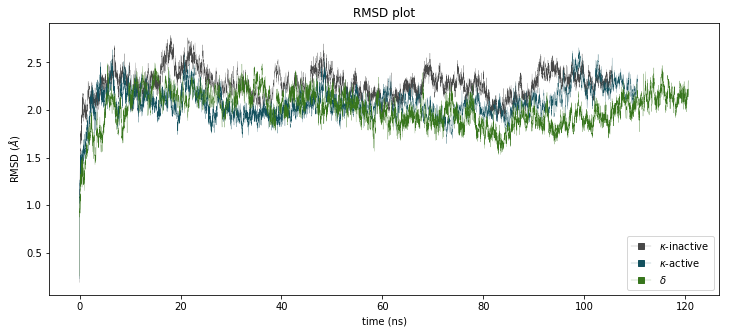

In [5]:
fig, ax = plt.subplots(figsize=(12,5))

for i in range(len(FOLDER_NAMES)):
    file = '../'+FOLDER_NAMES[i]+'/plots/all_rmsd.txt'

    data = np.loadtxt(file)
    data = data.T
    time = data[1]

    ax.plot(time/1000, data[2], linewidth=0.2, color=COLORS[i] ,label=NAMES[i])

plt.ylabel('RMSD ($\AA$)')
plt.xlabel('time (ns)')
plt.title('RMSD plot')
legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_marker('s')

In [6]:
save_figure(fig, '../all_plots/rmsd_plot')

# RMSF

([<matplotlib.axis.XTick at 0x7faeca78ecc0>,
 <a list of 7 Text xticklabel objects>)

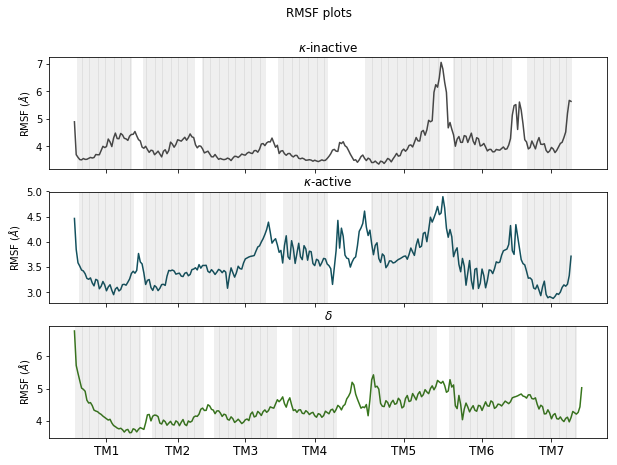

In [7]:
fig, ax = plt.subplots(len(FOLDER_NAMES),1, figsize=(10,7), sharex=True)

for i in range(len(FOLDER_NAMES)):
    file = '../'+FOLDER_NAMES[i]+'/plots/rmsf_prod.txt'

    data = np.loadtxt(file)
    
    loop_inf = np.loadtxt('../'+FOLDER_NAMES[i]+'/loop_inf.txt', dtype='int')
    helix = np.array([])
    for row in loop_inf:
        helix = np.concatenate((helix, np.arange(row[1], row[2]+1)))
    struct = {'helix': helix}

    ax[i].plot(data[:,1], color=COLORS[i] ,label=NAMES[i])
    for j, k, in enumerate(struct['helix']):
        ax[i].axvline(k, color='#3b3b3b', alpha=0.1)
        
    ax[i].set_ylabel('RMSF ($\AA$)')
    ax[i].set_title(NAMES[i])

fig.suptitle('RMSF plots')
bars = ('TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7')
y_pos = [18, 58, 96, 135, 185, 229, 268]

plt.xticks(y_pos, bars,fontsize='12')

In [8]:
save_figure(fig, '../all_plots/rmsf_plot')

# Water within protein

In [9]:
def concatenate_water_per_frame(water_files):
    waters = np.loadtxt(water_files[0])
    for i in range(1, len(water_files)):
        data = np.loadtxt(water_files[i])
        waters = np.concatenate((waters, data))
    return waters

ValueError: x and y must have same first dimension, but have shapes (11000,) and (9000,)

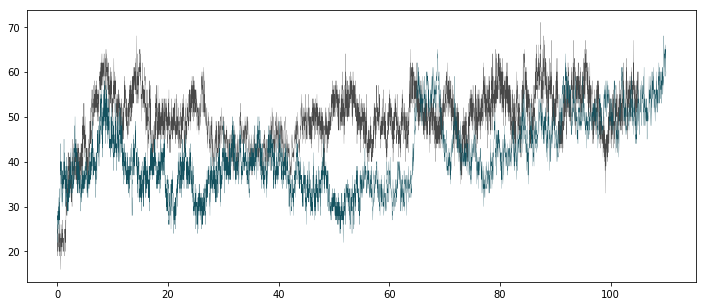

In [10]:
fig, ax = plt.subplots(figsize=(12,5))

for i in range(len(FOLDER_NAMES)):
    file = '../'+FOLDER_NAMES[i]+'/plots/water_within_protein.txt'
    data = np.loadtxt(file)
    
    ax.plot(TIME[i]/1000, data[:,1], linewidth=0.2, color=COLORS[i] ,label=NAMES[i])
    
plt.ylabel('Number of water')
plt.xlabel('time (ns)')

plt.title('Water within protein')

legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_marker('s')

In [ ]:
print(TIME[2])

In [ ]:
save_figure(fig, '../all_plots/water_within_protein')

# Sodium distance

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

for i in range(len(FOLDER_NAMES)):
    file = '../'+FOLDER_NAMES[i]+'/plots/sod_coor.txt'

    data = np.loadtxt(file)
    print(i)
    ax.plot(TIME[i]/1000, data[:,4], linewidth=0.4, color=COLORS[i] ,label=NAMES[i])
    

plt.ylabel('Distance ($\AA$)')
plt.xlabel('time (ns)')

plt.title('Distance of sodium and its binding pocket')

legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_marker('s')

In [ ]:
save_figure(fig, '../all_plots/sodium_distance')